# Tugas 2 : Crawling dan Struktur Mining  

Pada tugas ini diminta untuk mencoba crawling pada website PTA Trunojoyo dan berita online serta melakukan struktur web mining

Penulis:

*   Nama : Willy Chairullah Fauzi Putra
*   NIM : 220411100045
*   Kelas: PPW


## Crawling PTA Trunojoyo

### install package

In [ ]:
# %pip install builtwith
# %pip install requests 
# %pip install beautifulsoup4 

### import library

In [91]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Proses Crawling PTA

In [92]:
data = {"penulis": [], "judul": [], "abstrak_indo": [], "abstrak_english": [], "pembimbing_pertama": [], "pembimbing_kedua": [], "prodi": []}

def pta():
    byProd = 1
    beforeProdiFound = True
    prodiFound = True

    # Hilangkan kondisi byProd jika ingin crawling semua
    while (prodiFound or beforeProdiFound) and byProd <= 3 :
        beforeProdiFound = prodiFound

        url = "https://pta.trunojoyo.ac.id/c_search/byProd/{}".format(byProd)
        r = requests.get(url)
        request = r.content
        soup = BeautifulSoup(request, "html.parser")

        prodi_element = soup.select_one('h2:contains("Journal Jurusan")')

        # Pastikan untuk memeriksa apakah ada nama prodi
        if prodi_element:
            prodi = prodi_element.text.split(' Jurusan ')[1]
            prodiFound = True
        if prodi == '':
            prodiFound = False

        print(f"{byProd}. {prodi}")

        jurnalFound = True
        pageProd = 1

        jurnal_ke = 1

        # Hilangkan kondisi pageProd jika ingin crawling semua
        while jurnalFound and pageProd <= 1:

            url = "https://pta.trunojoyo.ac.id/c_search/byProd/{}/{}".format(byProd,pageProd)
            r = requests.get(url)
            request = r.content
            soup = BeautifulSoup(request, "html.parser")

            jurnals = soup.select('li[data-cat="#luxury"]')
            if len(jurnals) < 1:
                jurnalFound = False

            # Menggunakan while loop untuk memproses jurnal
            jurnal_index = 0
            while jurnal_index < len(jurnals):
                jurnal = jurnals[jurnal_index]
                try:
                    response = requests.get(jurnal.select_one('a.gray.button')['href'])
                    soup1 = BeautifulSoup(response.content, "html.parser")

                    isi = soup1.select_one('div#content_journal')

                    judul = isi.select_one('a.title').text

                    penulis = isi.select_one('span:contains("Penulis")').text.split(' : ')[1]

                    pembimbing_pertama = isi.select_one('span:contains("Dosen Pembimbing I")').text.split(' : ')[1]

                    pembimbing_kedua = isi.select_one('span:contains("Dosen Pembimbing II")').text.split(' :')[1]

                    abstrak = isi.select('p[align="justify"]')
                    # Mengambil abstrak Indonesia dan Inggris
                    abstrak_indo = abstrak[0].text if len(abstrak) > 0 else "No Indonesian abstract"
                    abstrak_english = abstrak[1].text if len(abstrak) > 1 else "No English abstract"

                    data["penulis"].append(penulis)
                    data["judul"].append(judul)
                    data["pembimbing_pertama"].append(pembimbing_pertama)
                    data["pembimbing_kedua"].append(pembimbing_kedua)
                    data["abstrak_indo"].append(abstrak_indo)
                    data["abstrak_english"].append(abstrak_english)
                    data["prodi"].append(prodi)

                    print(f"{jurnal_ke}  Berhasil crawl: {judul[:50]}...")

                except Exception as e:
                    print(f"  Error processing jurnal {jurnal_index}: {e}")

                # Pindah Jurnal
                jurnal_index += 1
                jurnal_ke += 1

            # Pindah Pagination / Halaman
            pageProd += 1

        # Mengubah kondisi Jurnal True
        jurnalFound = True

        # Pindah Prodi
        byProd += 1

    df = pd.DataFrame(data)
    df.to_csv("pta.csv", index=False)

    print(f"\nData berhasil disimpan: {len(df)} records")
    print(f"Kolom: {list(df.columns)}")
    return df

### Menjalankan fungsi crawling

In [93]:
import time
start_time = time.time()

df_result = pta()

end_time = time.time()
print(f"\nWaktu total crawling: {(end_time - start_time):.2f} detik")
print(f"Rata-rata per record: {(end_time - start_time)/len(df_result):.2f} detik")

1. Ilmu Hukum
1  Berhasil crawl: Implementasi Fungsi Legislasi Dewan Perwakilan Rak...
2  Berhasil crawl: Pertanggungjawaban Pidana Direksi BUMN (Persero)
...
3  Berhasil crawl: Analisis Terhadap Kekosongan Hukum dalam Pengawasa...
4  Berhasil crawl: PERLINDUNGAN HUKUM BAGI KONSUMEN ATAS PRODUK ELEKT...
5  Berhasil crawl: TELAAH  KRITIS TENTANG ALASAN HUKUM YANG DIGUNAKAN...
2. Teknologi Industri Pertanian
1  Berhasil crawl: Sifat Fisik dan Profil Gelatinisasi Tepung Uwi Ung...
2  Berhasil crawl: PENGARUH KONSENTRASI FLOKULAN (MAGNAFLOC LT 27 P) ...
3  Berhasil crawl: Optimasi Penggunaan Tepung Labu Kuning dan Gum Ara...
4  Berhasil crawl: Kondisi Optimum Pembuatan Cup Cake Tersubstitusi T...
5  Berhasil crawl: ANALISIS FINANSIAL PADA PRODUKSI ROTI TAWAR MENGGU...
3. Agribisnis
1  Berhasil crawl: PROSPEK USAHA BAKSO IKAN DI PULAU MANDANGIN KABUPA...
2  Berhasil crawl: Analisis Dampak Pola Kemitraan Terhadap Pendapatan...
3  Berhasil crawl: Pemanfaatan Modal Sosial Usahatani Tembakau di

### Memuat dan menampilkan hasil crawling

In [94]:
df = pd.read_csv("pta_all.csv")

print("=== STATISTIK HASIL CRAWLING ===")
print(f"Total records: {len(df)}")
print(f"Kolom: {list(df.columns)}")
print()

# Statistik per prodi
print("=== DISTRIBUSI PER PRODI ===")
prodi_counts = df['prodi'].value_counts()
print(prodi_counts)
print()

# Contoh data
print("=== CONTOH DATA ===")
for i in range(min(3, len(df))):
    print(f"\n--- Record {i+1} ---")
    print(f"Prodi: {df.iloc[i]['prodi']}")
    print(f"Judul: {df.iloc[i]['judul'][:80]}...")
    print(f"Penulis: {df.iloc[i]['penulis']}")
    print(f"Abstrak Indo: {df.iloc[i]['abstrak_indo'][:100]}...")
    print("-" * 80)

=== STATISTIK HASIL CRAWLING ===
Total records: 14677
Kolom: ['penulis', 'judul', 'abstrak_indo', 'abstrak_english', 'pembimbing_pertama', 'pembimbing_kedua', 'prodi']

=== DISTRIBUSI PER PRODI ===
prodi
Ilmu Hukum                               1417
Manajemen                                1031
Pgsd                                      913
Akuntansi                                 883
Teknik Informatika                        858
Teknik Industri                           711
Sosiologi                                 677
Ilmu Komunikasi                           674
Sastra Inggris                            665
Ekonomi Pembangunan                       589
Agroteknologi                             577
Teknologi Industri Pertanian              568
Ekonomi Syariah                           561
Agribisnis                                547
Psikologi                                 517
Ilmu Kelautan                             480
Pendidikan Ipa                            417
Hukum Bisnis S

## Crawling Website Berita Online (kompas)

### Persiapan Library

In [95]:
# %pip install beautifulsoup4
# %pip install matplotlib
# %pip install requests
# %pip install networkx
# %pip install pandas

In [96]:
# alat untuk crawling
from urllib.request import urlopen
from bs4 import BeautifulSoup

# dataframe
import pandas as pd

# monitoring
from tqdm import tqdm
import time

**urlopen** berfungsi sebagai http client untuk menangkap dan memproses url

**BeautifulSoup** berfungsi untuk mengambil dan memetakan data (parse) dari HTML/XML

**pandas** berfungsi untuk memproses data ke dalam dataframe

**tqdm** berfungsi untuk melakukan tracking terhadap proses pengambilan setiap berita

### Membuat Fungsi untuk Persiapan Crawling

In [97]:
# fungsi untuk mengambil link yang akan dilakukan crawling
def extract_urls(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    urls = soup.find_all("a", {"class": "paging__link"})
    urls = [url.get('href') for url in urls]

    return urls

# fungsi untuk mengambil isi dari berita
def get_content(url):
    # Menambahkan headers untuk menghindari deteksi sebagai bot
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    
    try:
        # Menggunakan requests dengan headers
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        
        div = soup.find("div", {"class": "read__content"})
        if div:
            paragraf = div.find_all("p")
            content = ''
            for p in paragraf:
                content += p.text
            return content
        else:
            return "Content not found"
    except Exception as e:
        print(f"Error accessing {url}: {e}")
        return "Error retrieving content"

function **extract_urls** digunakan untuk melakukan ekstraksi link url yang memiliki pagination pada halaman awal, sehingga didapat beberapa url yang bisa mengarah ke halaman selanjutnya atau sebelumnya.

function **get_content** digunakan untuk melakukan proses pembuatan isi berita sesuai link berita yang dicari.

### Crawling Data

Pada tahap ini dilakukan proses crawling data terhadap berita dari url yang akan dicari. Dibutuhkan beberapa variabel yang perlu disiapkan

*   **news** digunakan untuk menyimpan data berita hasil crawling
*   **link** digunakan untuk menentukan url website yang akan dicari
*   **page** digunakan untuk menentukan jumlah halaman yang akan dicari
*   **news_per_page** digunakan untuk menentukan jumlah berita per halaman
*   **urls** digunakan untuk menampung beberapa link yang akan dilakukan proses crawling



In [98]:
# inisialisasi variabel penampung hasil berita
news_data = []

# inisialisasi persiapan untuk crawling berita
link = "https://indeks.kompas.com"
# last_url = extract_urls(link).pop()
# page = last_url.split('=').pop() # jumlah halaman secara otomatis
page = 1 # jumlah halaman secara manual

# persiapan link yang akan dilakukan crawling
urls = [link + '/?page=' + str(a) for a in range(1, int(page) + 1)]

# menelusuri semua link yang telah ditentukan
for idx, url in enumerate(urls):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    # mengambil data yang diperlukan pada struktur html
    links       = soup.find_all("a", {"class": "article-link"})
    titles      = soup.find_all("h2", {"class": "articleTitle"})
    dates       = soup.find_all("div", {"class": "articlePost-date"})
    categories  = soup.find_all("div", {"class": "articlePost-subtitle"})

    news_per_page = len(links) # berita artikel yang ditampilkan

    # memasukkan data ke dalam list
    for elem in tqdm(range(news_per_page)):
      news = {}
      news['No']               = news_per_page * idx + (elem + 1)
      news['Judul Berita']     = titles[elem].text
      news['Isi Berita']       = get_content(links[elem].get("href"))
      news['Tanggal Berita']   = dates[elem].text
      news['Kategori Berita']  = categories[elem].text

      news_data.append(news)

100%|██████████| 15/15 [00:06<00:00,  2.44it/s]


### Konversi ke dalam Data Frame

In [99]:
main_df = pd.DataFrame(news_data).set_index('No')
main_df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
No,,,,
1,"Jambret Kalung Viral di Medsos, 2 Begal di Sum...","SUMBAWA, KOMPAS.com - Dua orang begal berinisi...",10/09/2025,REGIONAL
2,Akhir Kejahatan Komplotan Begal Bengis di Suba...,"SUBANG, KOMPAS.com - Polisi membekuk komplotan...",10/09/2025,REGIONAL
3,"Usai Macan Tutul Kabur, Lembang Park and Zoo S...","KOMPAS.com - Lembang Park and Zoo (LPZ), Kabup...",10/09/2025,PROV
4,Media Vietnam Soroti Kegagalan Indonesia Lolos...,KOMPAS.com - Kegagalan Timnas Indonesia menemb...,10/09/2025,TREN
5,"iPhone 17 Pro dan 17 Pro Max Resmi, Triple Kam...",KOMPAS.com - Apple akhirnya merilis iPhone 17 ...,10/09/2025,TEKNO
6,Simak Deretan Mobil Menteri Koperasi Ferry Jul...,"JAKARTA, KOMPAS.com - Ferry Joko Juliantono re...",10/09/2025,OTOMOTIF
7,Cerita Ustaz Khalid Basalamah Pindah dari Haji...,"JAKARTA, KOMPAS.com - Direktur dan pemilik PT ...",10/09/2025,NEWS
8,APBD Gorontalo 2026 Terancam Anjlok Rp 200 Mil...,"GORONTALO, KOMPAS.com – Anggaran Pendapatan da...",10/09/2025,REGIONAL
9,"Perancis Vs Islandia 2-1, Komentar Mbappe Usai...",KOMPAS.com - Kylian Mbappe mampu melewati reko...,10/09/2025,BOLA


### Save data to CSV

In [100]:
main_df.to_csv('data_berita.csv', index=False)

## Web Structur Mining

### Import Library

In [101]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urljoin, urlparse
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

### Inisialisasi Variabel Global

In [102]:
# Variabel global
visited = set()
web_structur = []

### Fungsi Crawling

In [103]:
def crawl_website(url, base_domain, max_depth, max_results, depth=0):
    # Kondisi untuk menghentikan crawl jika sudah mencapai batas maksimal hasil
    if len(web_structur) >= max_results:
        print("Batas maksimal hasil crawl telah tercapai.")
        return

    if url in visited or depth > max_depth:
        return
    visited.add(url)

    try:
        response = requests.get(url, verify=False, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Ambil semua link
        links = soup.find_all('a', href=True)
        for link in links:
            # Hentikan loop jika sudah mencapai batas
            if len(web_structur) >= max_results:
                break

            full_url = urljoin(url, link['href'])  # absolute URL

            web_structur.append({
                "page": url,
                "link keluar": full_url
            })

            # Batasi hanya ke domain informatika.trunojoyo.ac.id
            if base_domain in urlparse(full_url).netloc:
                crawl_website(full_url, base_domain, max_depth, max_results, depth + 1)

    except Exception as e:
        print(f"Error saat akses {url}: {e}")

def run_crawler(start_url, max_depth=2, max_results=500):
    base_domain = urlparse(start_url).netloc
    crawl_website(start_url, base_domain, max_depth=max_depth, max_results=max_results)

### Eksekusi Crawling

In [104]:
start_url = "https://informatika.trunojoyo.ac.id/"
run_crawler(start_url, max_depth=1)

print(f"Jumlah data hasil crawl: {len(web_structur)}")

Batas maksimal hasil crawl telah tercapai.
Jumlah data hasil crawl: 500


### Konversi ke DataFrame & Simpan ke CSV

In [105]:
df = pd.DataFrame(web_structur)
df.to_csv("hasil_crawl.csv", index=False, encoding="utf-8")

print("Hasil crawling disimpan ke 'hasil_crawl.csv'")
df.head(10)

Hasil crawling disimpan ke 'hasil_crawl.csv'


,page,link keluar
0,https://informatika.trunojoyo.ac.id/,https://informatika.trunojoyo.ac.id/
1,https://informatika.trunojoyo.ac.id/,https://informatika.trunojoyo.ac.id/
2,https://informatika.trunojoyo.ac.id/,https://informatika.trunojoyo.ac.id/bidang-min...
3,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/
4,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
5,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
6,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
7,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
8,https://informatika.trunojoyo.ac.id/bidang-min...,https://informatika.trunojoyo.ac.id/bidang-min...
9,https://informatika.trunojoyo.ac.id/bidang-min...,https://labtif.sakera.id/dosen


### Visualisasi Graph dengan URL Asli

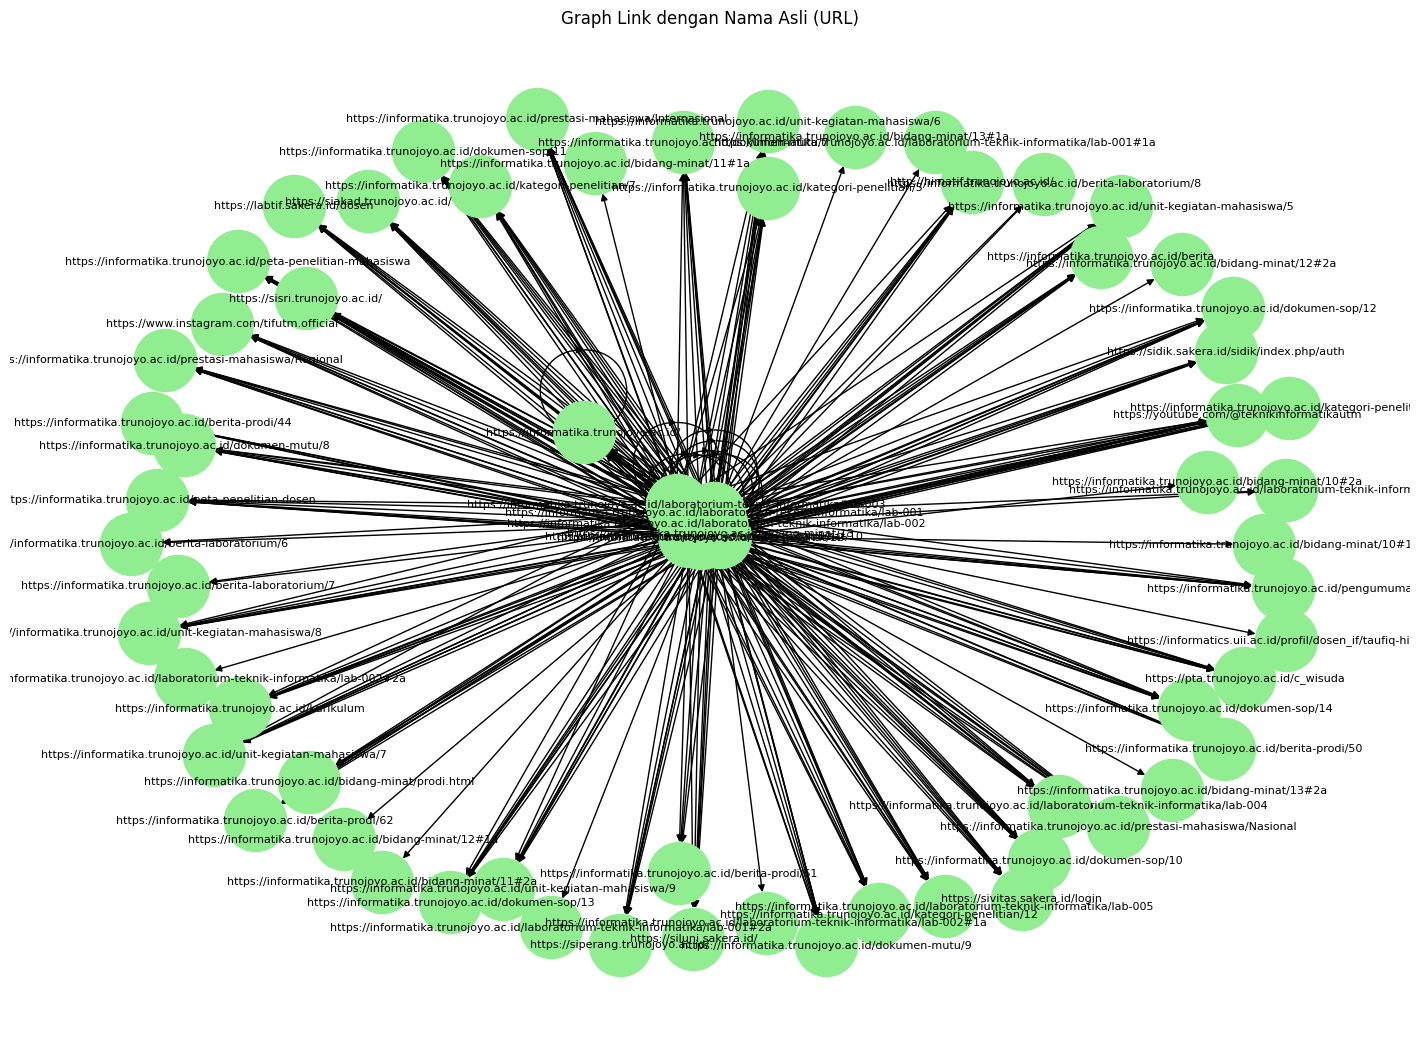

In [106]:
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["page"], row["link keluar"])

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgreen",
        font_size=8, arrows=True)

plt.title("Graph Link dengan Nama Asli (URL)")
plt.axis("off")

plt.savefig("graf_url.png", dpi=300, bbox_inches="tight")
plt.show()